# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно  определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [ ]:
#импортируем библиотеку
#сохраним в переменную датафрейм, выведем информацию
import pandas as pd
import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info

<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

Исходная таблица содержала разделитель '\t', указав его в параметре sep получили 22 колонки. Некоторые столбцы соддержат пропуски **NaN**.

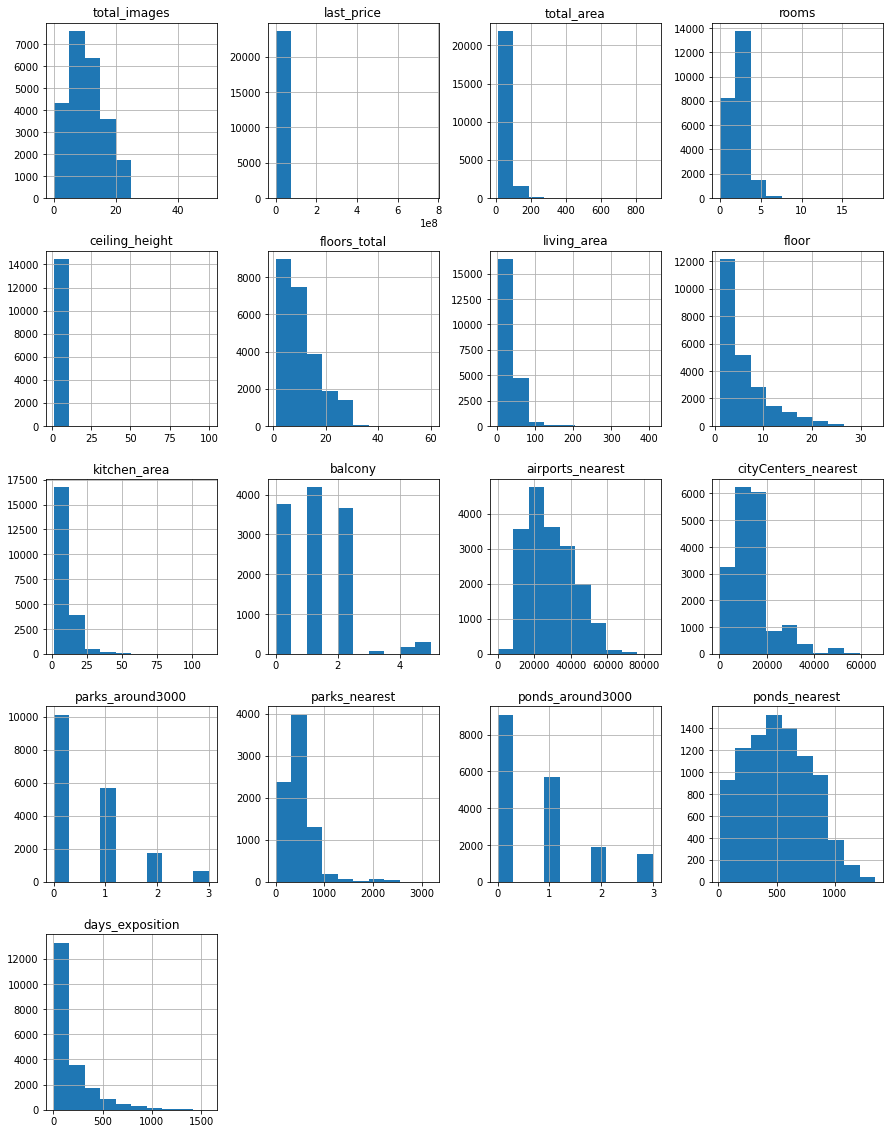

In [ ]:
#Построим гистограммы по числовым столбцам
data.hist(figsize=(15,20))
plt.show()

По гистограммам видно, что total_images содержит большинство объявлений с 10 фото. 
    
Столбец **last_price** показывает, что цена распределаена в основном до значения 1*10^8. 
    
Общая площадь в **'total_area'** распределяется с пиком на 100 кв м.
    
В **rooms** основная часть объявлений расположилась до 5.
    
Высота потолков **'ceiling_height'** имеет выделенный пик до 10.
    
 В  **floors_total** большинство домов имеют до 10 этажей.</b> </b> 
    
 Жилая площадь **living_area** в большинстве случаев до 50 кв.м.
    
   </b>  Большая часть объявлений имеет имеет этаж квартиры до 5, затем уменьшение по количеству.
    
   </b>  Наибольшее количество квартир с кухней до 15 кв.м.
    
  </b>   0,1,2 балконов имеет приблизительно одинаковое число квартир.
    
   </b>  Наибольшое число квартир удалены от аэропорта на 20000м в **airports_nearest**, но находятся в пределах города на 20000м в **cityCenters_nearest**.
    
   </b>  Большинство квартир находится у водоемов в 0 м, в двое меньше в 1км от водоема, остальных меньше в **parks_around3000**. А по **ponds_nearest** видно, что пик квартир, расположенных в 500м от водоема.
    
  </b>   По **parks_nearest** видно, что большинство квартир находится до 1000 м близости от парков.
    
   </b>  По **ponds_around3000** видно,что больше 8000 квартир живут прям возле парка, чуть меньше 6000 квартир с удаленностью в 1 км от парка, остальных объявлений меньше 2000 до 2 и 3 км от парка.
    
   </b>  Основное время продаж квартир до 200 дней по гистограмме **days_exposition**.
    


In [ ]:
#выведем список характерных значений
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


 При анализе характерных значений видно, цена имеет стандартное  отклонение значение порядка на 10 от среднего значения, это говорит о выбросах, имеющихся в  данных. 

**Общая площадь** от 12 до 900 кв.м. с большим стандартным отклонением в 35,6.
    
**Число комнат** от 0, возможно, это студии, и до 19 шт, со срдним числом в 2, отклонение в 1,07-небольшое.
    
**Высота потолков** от 1м до 14м, с малньким стандартным отклонением в 0,31.
    
**Этажность домов** рассматривается с 1 по 60, со средним знаением в 10 и стандартным отклонением  в 6,59. Возможно, в значениях есть какие то выбросы или аномалии, влияющие на стд. отклонение.
    
**Жилая площадь** начинается с 2 и до 409,7 кв.м, со средним значением в 34,32 кв.м. Стандартное отклонение также велико- 21,7.
    
**Этаж квартир** с 1 по 33, 75% квартир до 8 этажа, стд отклонение 4,88, тоже есть некий разброс небольшой.
    
Самая маленькая **кухня с площадью** 1,3 кв.м., максимальноее значение 112 кв.м, стд отклонение 5,66.
    
Большинство объявлений не имеют **балкон**, 75% - 1 балкон, и маленькое стдандартное отклонение - 0,95.
    
**Удаленность от города** максимальная в 65,95 км, среднее число квартир на 14,19 км удалены от города, стд отклонение 8,6.
    
**Удаленность от парка** имеет огромное значение стд отклонения 342, видимо в заполненных геоданных есть какие то аномалии. Тоже в случаес **расстоянием до ближайшего водоема**-стд отклонение 277.
    
**Дни продажи** расположены с 1 до 1580 и со стд отклонением в 219.


### Предобработка данных

In [ ]:
#изучим типы колонок
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Столбец **'first_day_exposition'** с датой, имеет тип данных **'object'** - т.е. воспринимается как строка, необходимо будет перевести в нужный. Столбец  **'is_apartment'** имеет тип данных **'object'**, а не нужный **'bool'**. столбец **'balcony'** имеет тип данных **'float64'**, хотя количество балконов - это целое число, также и по столбцу **'days_exposiion'** - тип **'float64'**, хотя сколько дней было размещено объявления вряд ли могут быть не целыми, тоже и с **'floors_total'** -количеством этажей с типом **'float64'**.

In [ ]:
#изучим пропуски в значениях в долях процентов от общего числа строк
(data.isna().sum())*100/23699 
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Изучим пропуски в значениях в долях процентов от общего числа строк. В **ceiling_height** 38,79% пропусков, чуть меньше половины значений. В расчетах нам не пригодятся, поэтому пропуск можно не заполнять.
    
в **floors_total** незначительный процент пропусков 0,36%, если заполним значениями этажа квартиры, то на исследование не повлияет.

**Living_area** имеет 8%, не очень большой процент,поэтому наши заполнения этого столбца не сильно повлияют на итог исследования.
    
**is_apartment** имеет пропуски 88% от общего числа строк, вероятно, квартиры не имеют статус аппартаментов и это просто не указали, заполним далее значениями.
    
**kitchen_area** имеет 9,6% не очень большой процент пропусков, чтобы их отстуствие как то сильно повлияло на исследование. Поэтому сможем заполнить пропуски медианным значением.

**balcony** имеет пропуски 48,6%, это почти половина от значений. Возможно, что эти квартиры просто не имеют болконов, поэтому и не указали их. Заполним значени далее
    
Всего 0,2% не указано название населенного пункта **locality_name**, это маленький процент.

Геоданные некоторые столбцы имеют одинаковый процент пропусков в 23,28%, а другие 65,9%. Пропуски в столбцах с геоданными оставим без изменения, например, если не указана удаленность от аэропорта, возможно его в этом городе и вовсе нет, поэтому не заполненны и т.д.
    
**days_exposition** имеет 13,4% пропусков,  относятся скорее всего к квартирам, которые еще в продаже.


In [ ]:
#проверим  уникальные значения высоты потолков
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Есть значения патолков аномально высокие, возможно вместо 24 м  должно быть 2,4 м. Приведем значения в порядок.

In [ ]:
#посчитаем долю значений потолка выше 20 м
(data.loc[data['ceiling_height'] >= 20, 'ceiling_height'].count()*100)/\
(len(data.index) - data['ceiling_height'].isna().sum())

0.15857694429123

Процент аномальных явлений-значений потолка выше 20м -   всего 0,15%. Поэтому их изменения не повлияют особо на исследование.

In [ ]:
#заменяем значения выше 20
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] =  data['ceiling_height']/10

In [ ]:
#проверим значения после замены
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

In [ ]:
#заполним пропуски в столбце - всего этажей в доме на значение из столбца этаж.
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [ ]:
#проверяем еще раз пропуски 
data['floors_total'].isna().sum()

0

Чтобы заполнить пропуски в столбце со значениями сколько всего этажей в доме **'floors_total'**, приравняем пустые значения к этажу квартиры **'floors'**.

In [ ]:
#заменим пустые значения балконов на ноль.
data['balcony'] = data['balcony'].fillna(0)

In [ ]:
#проверяем на наличие пустых значении, их нет.
data['balcony'].isna().sum()

0

Возможно, некоторые объявления о продаже квартир имеют пропуски в значениях столбца число балконов **'balcony'**, потому что сами балконы отсутствуют в квартире. Поэтому заменяем пустые значения на нулевые.

In [ ]:
##заменим пустые значения в столбце аппартаменты на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
#проверяем на наличие пустых значений
data['is_apartment'].isna().sum()

0

Некоторые объявления о продаже квартир имеют пропуски в значениях столбца аппартаменты **'is_apartment'**, потому что квартиры не являются апартаментами и не сочли нужным это указать. Поэтому заменим пустые значения на False.

In [ ]:
#посчитаем количество уникальных значений в названиях населенных пунктах
data['locality_name'].unique().shape[0]

365

In [ ]:
#выведем уникальные значения в названиях населенных пунктах
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Визуально видно, что есть слово **поселок**, а есть **посёлок**. из-за этого могут быть задвоения в названиях. Также заменим **'коттеджный поселок', 'поселок городского типа', 'городской поселок'** на **поселок**, чтобы избежать дубликатов в названиях.

In [ ]:
#Заменили все пустые значения на 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')

In [ ]:
#заменим в слове посёлок букву ё на е
#приведем поселки к одному слову, чтобы минимизировать дубликаты
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

def replace_wrong_locality_name(wrong_locality_name, correct_locality_name):
    for wrong_locality_name in wrong_locality_name:
        data['locality_name'] = data['locality_name'].str.replace(wrong_locality_name, correct_locality_name)
dulicates = ['коттеджный поселок', 'поселок городского типа', 'городской поселок']
name = 'поселок'
replace_wrong_locality_name(dulicates, name)


In [ ]:
#найдем число уникальных значений
data['locality_name'].unique().shape[0]

322

Видим, что число уникальных значений уменьшилось, значит пробразования успешны.

In [ ]:
#заполним пустые значения столбца с жилой площадью на среднее арифметическое 
#для квартир с таким же количеством комнат
data['living_area'] = data['living_area'].fillna(
    data.groupby('rooms')['living_area'].transform("median")
)

In [ ]:
#заполним пустые значения столбца с  площадью кухни на среднее арифметическое 
#для квартир с таким же количеством комнат
data['kitchen_area'] = data['kitchen_area'].fillna(
    data.groupby('rooms')['kitchen_area'].transform("median")
)

#включим в датасет квартиры удовлетворяющие условию
data = data.loc[(data['kitchen_area'] + data['living_area']) < data['total_area']]
#посмотрим датасет квартир с противоположным условием
data_total_area_more = data.loc[(data['kitchen_area'] + data['living_area']) > data['total_area']]
data_total_area_more.shape[0] 

0

In [ ]:
#проверим изменения в пустых значениях
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8888
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5314
cityCenters_nearest      5291
parks_around3000         5290
parks_nearest           15166
ponds_around3000         5290
ponds_nearest           14204
days_exposition          3135
dtype: int64

Оставшиеся пустые значения в столбце **days_exposition** относятся скорее всго к квартирам, которые еще в продаже.
Столбец **ceiling_height** нам для расчетов не пригодится, поэтому его пустые значения нас не волнуют.

Пропуски в столбцах с геоданными оставим без изменения, например, если не указана удаленность от аэропорта, возможно его в этом городе и вовсе нет, поэтому не заполненны и т.д.

In [ ]:
#выведем уникальные значения столбца 
data['is_apartment'].unique()

array([False,  True])

In [ ]:
#переводим тип данных в bool
pd.set_option('mode.chained_assignment', None)
data['is_apartment'] = data['is_apartment'].astype('bool')

In [ ]:
#переводим тип данных в целочисленный
data['floors_total'] = data['floors_total'].astype('int32')

In [ ]:
#переводит дату в формат datetime64
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
#переводим тип данных в целочисленный
data['balcony'] = data['balcony'].astype('int32')

In [ ]:
#проверим изменения в типах данных
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Переводим тип данных в **bool 'is_apartment'**, т.к. стобец имеет значения True,False. 
Переводим тип данных в целочисленный у столбца **'floors_total'**, этажи имеют целое число только.
переводит дату в формат **datetime64** столбец  **first_day_exposition'**.

In [ ]:
#проверим на дубликаты
data.duplicated().sum()

0

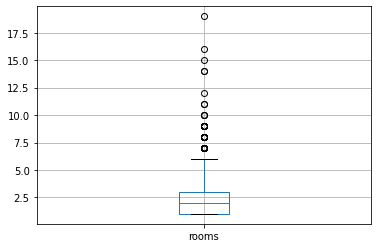

In [ ]:
#построим диаграмму размаха для rooms
data.boxplot(column='rooms')
plt.show()

In [ ]:
#посчитаем границу выбросов для rooms
q1 = data['rooms'].quantile(0.25)
q3 = data['rooms'].quantile(0.75)
release_max_rooms = q3+1.5*(q3-q1)
release_min_rooms = q3-1.5*(q3-q1)
print(release_max_rooms)
print(release_min_rooms)

6.0
0.0


In [ ]:
#посчитаем долю значений квартиры с комнатами больше 6 
round((data.loc[data['rooms'] >  release_max_rooms, 'rooms'].count()*100)/
 (len(data.index) - data['rooms'].isna().sum()),2)

0.3804582792909641

In [ ]:
#оставим в таблице значения квартир с комнатами 6 включительно
data = data.loc[data['rooms'] <= release_max_rooms]

Посчитали долю значений квартиры с комнатами больше 6, получилось 0,38%. Это маленький процент, поэтому удалим эти значения, их отсутствие не повлияет на исследование.  

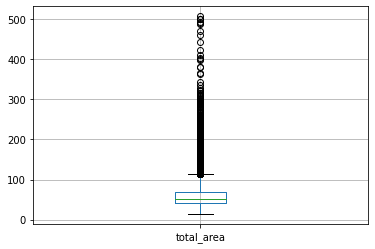

In [ ]:
#построим диаграмму размаха для total_area
data.boxplot(column='total_area')
plt.show()

In [ ]:
#посчитаем границу выбросов для total_area
q1 = data['total_area'].quantile(0.25)
q3 = data['total_area'].quantile(0.75)
release_max_total_area = q3+1.5*(q3-q1)
release_min_total_area = q3-1.5*(q3-q1)
print(release_max_total_area)
print(release_min_total_area)

114.25
25.75


In [ ]:
#посчитаем долю значений квартиры с площадью больше 114.25 м
round((data.loc[data['total_area'] > release_max_total_area, 'total_area'].\
 count()*100)/(len(data.index) - data['total_area'].isna().sum()),2)

5.003905910945231

In [ ]:
#оставим в таблице значения общей площади до 114.25 кв.м. включительно
data =data.loc[data['total_area'] <= release_max_total_area]

Посчитали долю значений квартиры с площадью больше 114.25 м, получилось 5%. Это допустимый процент, поэтому удалим эти значения, их отсутствие не повлияет на исследование.  Оставим в таблице значения общей площади до 114.25 кв.м. включительно 

In [ ]:
#посчитаем долю значений квартиры с площадью меньше 25.75 м
round(data.loc[data['total_area'] < release_min_total_area, 'total_area'].\
 count()*100)/(len(data.index) - data['total_area'].isna().sum()),2)

0.2695417789757412

In [ ]:
#оставим в таблице значения общей площади от 25.75 кв.м. включительно
data =data.loc[data['total_area'] >= release_min_total_area]

Посчитали долю значений квартиры с площадью меньше 25.75 м, получилось 0,27%. Это маленький процент, поэтому удалим эти значения, их отсутствие не повлияет на исследование.  Оставим в таблице значения общей площади от 25,75 кв.м. включительно

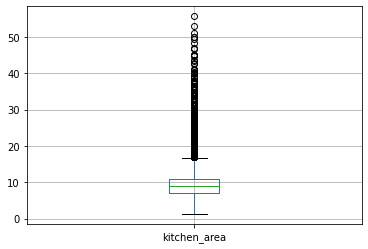

In [ ]:
#построим диаграмму размаха для kitchen_area
data.boxplot(column='kitchen_area')
plt.show()

In [ ]:
#посчитаем границу выбросов для kitchen_area
q1 = data['kitchen_area'].quantile(0.25)
q3 = data['kitchen_area'].quantile(0.75)
release_max_kitchen_area = q3+1.5*(q3-q1)
release_min_kitchen_area = q3-1.5*(q3-q1)
print(release_max_kitchen_area)
print(round(release_min_kitchen_area,2))

16.85
5.1499999999999995


In [ ]:
#посчитаем долю значений квартиры с площадью кухни меньше 5.15 м
round((data.loc[data['kitchen_area'] < release_min_kitchen_area, 'kitchen_area'].\
 count()*100)/(len(data.index) - data['kitchen_area'].isna().sum()),2) 

2.240036646816308

In [ ]:
#оставим в таблице значения  площади кухни от 5.15 кв.м. включительно
data = data.loc[data['kitchen_area'] >= release_min_kitchen_area]

 Посчитали долю значений квартиры с площадью кухни меньше 5,15 м, получилось 2,24%. Это маленький процент, поэтому удалим эти значения, их отсутствие не повлияет на исследование.  Оставим в таблице значения  площади кухни от 5,15 кв.м. включительно 

In [ ]:
#посчитаем долю значений квартиры с площадью кухни больше 16.85 кв м
round((data.loc[data['kitchen_area'] > release_max_kitchen_area, 'kitchen_area'].\
 count()*100)/(len(data.index) - data['kitchen_area'].isna().sum()),2) 

5.055995501616606

In [ ]:
#оставим в таблице значения  площади кухни до 16.85 кв.м. включительно
data = data.loc[data['kitchen_area'] <= release_max_kitchen_area]

Посчитали долю значений квартиры с площадью кухни большее 16,85 м, получилось 5%. Это допустимый процент, поэтому удалим эти значения, их отсутствие не повлияет на исследование.  Оставим в таблице значения  площади кухни до 16,85 кв.м. включительно 

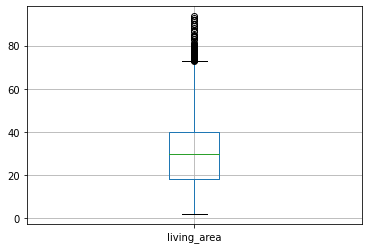

In [ ]:
#построим диаграмму размаха для living_area
data.boxplot(column='living_area')
plt.show()

In [ ]:
#посчитаем границу выбросов для living_area
q1 = data['living_area'].quantile(0.25)
q3 = data['living_area'].quantile(0.75)
release_max_living_area = q3+1.5*(q3-q1)
release_min_living_area = q3-1.5*(q3-q1)
print(release_max_living_area)
print(release_min_living_area)

73.0
7.0


In [ ]:
#посчитаем долю значений квартиры с жилой площадью  меньше 7 кв. м
round((data.loc[data['living_area'] < release_min_living_area, 'living_area'].\
 count()*100)/(len(data.index) - data['living_area'].isna().sum()),2) 

0.014806040864672786

In [ ]:
#оставим в таблице значения жилой площади от 7 кв.м. включительно
data = data.loc[data['living_area'] >= release_min_living_area]

 Посчитали долю значений квартиры с жилой площадью меньше 7 м, получилось 0,015%. Это маленький процент, поэтому удалим эти значения, их отсутствие не повлияет на исследование.  Оставим в таблице значения жилой площади от 7 кв.м. включительно 

In [ ]:
#посчитаем долю значений квартиры с жилой площадью  больше 73 м
round((data.loc[data['living_area'] > release_max_living_area, 'living_area'].count()*100)/\
(len(data.index) - data['living_area'].isna().sum()),2) 

0.459055234710499

In [ ]:
#оставим в таблице значения жилой площади до 73 кв.м. включительно
data = data.loc[data['living_area'] <= release_max_living_area]

 Посчитали долю значений квартиры с жилой площадью больше 73 м, получилось 0,46%. Это маленький процент, поэтому удалим эти значения, их отсутствие не повлияет на исследование.  Оставим в таблице значения жилой площади до 73 кв.м. включительно 

### Посчитаем и добавим в таблицу новые столбцы

In [ ]:
#создадим столбец с типами этажа: первый, последний, другой.
def categorize_floor(floor, floors_total):
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(lambda x: categorize_floor(x['floor'], x['floors_total']), axis=1)
data['floor_category'].value_counts()

другой       14831
последний     2788
первый        2547
Name: floor_category, dtype: int64

In [ ]:
#создадим столбец с днем публикации объявления
data['first_day_day'] = data['first_day_exposition'].dt.day
data['first_day_day']

1         4
2        20
5        10
6         2
8        23
         ..
23692     7
23693     5
23695    15
23696    11
23698    21
Name: first_day_day, Length: 20166, dtype: int64

In [ ]:
#создадим столбец с месяцем публикации объявления
data['first_day_month'] = data['first_day_exposition'].dt.month 
data['first_day_month']

1        12
2         8
5         9
6        11
8         5
         ..
23692     7
23693     8
23695     1
23696     2
23698     7
Name: first_day_month, Length: 20166, dtype: int64

In [ ]:
#создадим столбец с годом публикации объявления
data['first_day_year'] = data['first_day_exposition'].dt.year 
data['first_day_year']

1        2018
2        2015
5        2018
6        2017
8        2018
         ... 
23692    2017
23693    2016
23695    2018
23696    2018
23698    2017
Name: first_day_year, Length: 20166, dtype: int64

In [ ]:
#создадим столбец с днем недели публикации объявления
data['first_day_weekday'] = data['first_day_exposition'].dt.weekday
data['first_day_weekday']

1        1
2        3
5        0
6        3
8        2
        ..
23692    4
23693    4
23695    0
23696    6
23698    4
Name: first_day_weekday, Length: 20166, dtype: int64

In [ ]:
#Переведем значение столбца из метров в километры
data['cityCenters_nearest'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest']

1        18.603
2        13.933
5           NaN
6        19.143
8           NaN
          ...  
23692       NaN
23693    34.104
23695       NaN
23696       NaN
23698       NaN
Name: cityCenters_nearest, Length: 20166, dtype: float64

### Проведем исследовательский анализ данных

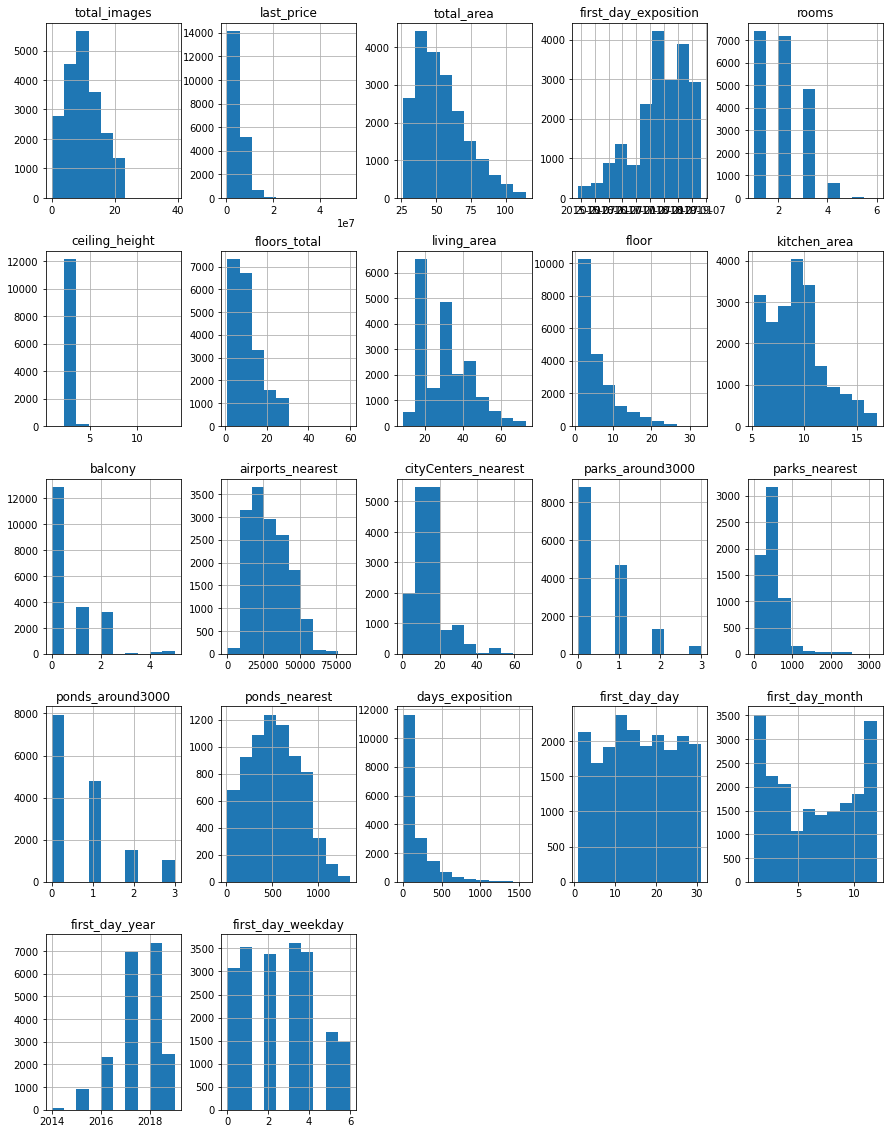

In [ ]:
#построим гистограммы для столбцов с числовым значением
data.hist(figsize=(15,20))
plt.show()

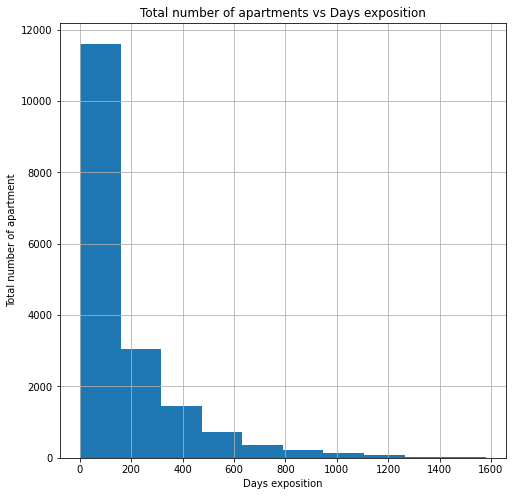

In [ ]:
#построим гистограмму по количеству дней до продажи
data['days_exposition'].hist( figsize=(8,8))
plt.title('Total number of apartments vs Days exposition')
plt.xlabel('Days exposition')
plt.ylabel('Total number of apartment')
plt.show()

In [ ]:
#найдем среднее значение 
data['days_exposition'].mean()

173.10273273613788

In [ ]:
#найдем медианное значеие
data['days_exposition'].median()

92.0

In [ ]:
#найдем количество дней самой быстрой продажи
data['days_exposition'].min()

1.0

In [ ]:
#найдем количество дней самой долгой продажи
data['days_exposition'].max()

1580.0

По гистограмме видно, что больше всего квартир, было продано меньше, чем за 200 дней. 
При подсчете **среднего значения**, выяснили точное количество дней - это 173. 
Самая **быстрая продажа** было совершена за 1 день, а самая **долгая продажа** совершена по истечению  1580 дней. 

In [ ]:
#посмотрим кореляцию Пирсона
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'living_area', 'kitchen_area']].corr()

,last_price,total_area,rooms,cityCenters_nearest,living_area,kitchen_area
last_price,1.000000,0.666717,0.397174,-0.333256,0.539219,0.431565
total_area,0.666717,1.000000,0.806879,-0.155680,0.914677,0.417446
rooms,0.397174,0.806879,1.000000,-0.096598,0.908926,0.025892
cityCenters_nearest,-0.333256,-0.155680,-0.096598,1.000000,-0.139222,-0.105138
living_area,0.539219,0.914677,0.908926,-0.139222,1.000000,0.168248
kitchen_area,0.431565,0.417446,0.025892,-0.105138,0.168248,1.000000



    
Нас интересует **Last_price** по отношению к **total_area, rooms, cityCenters_nearest**. Корелляция **Last_price** и **total_area**  имеет положительное значение 0,66, близко к 1. Это значит, что с ростом Общей площади растет и цена.
Корелляция **Last_price** и **living_area и kitchen_area**  имеет приблизительно одинаковые положительные значения 0,54 и 0,43, близко к 1. Но поменьше, чем у **total_area**.  Это значит, что с ростом жилой площади и площади кухни растет и цена, но связь немного слабее, чем у общей жилой площади с ценой.
    
Корелляция **Last_price** и **rooms**  имеет положительное значение 0,39, но оно далеко от 1. Значит, что связь между ростом одного значения в зависимости от другого зависит имеет **слабую линейную связь**.
    
Корелляция **Last_price** и **cityCenters_nearest**  имеет отрицательный коэффициент Пирсона -0,33, но далеко от значения -1. Значит, что рост одной величины связан с уменьшением другой, и линейная связь все же слаба.


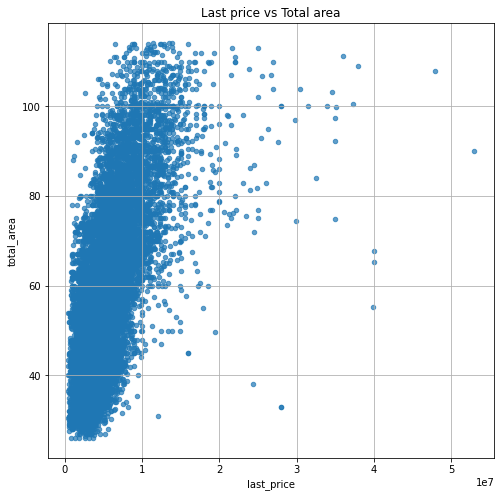

In [ ]:
#построим диаграмму рассеивания Last price vs Total area
data.plot(x='last_price', y='total_area', kind='scatter', \
          alpha=0.7, grid=True, figsize=(8,8))
plt.title('Last price vs Total area')
plt.show()

По диаграмме рассеивания видно небольшую зависимость общей площади квартиры и цены. Посмотрим еще один график.

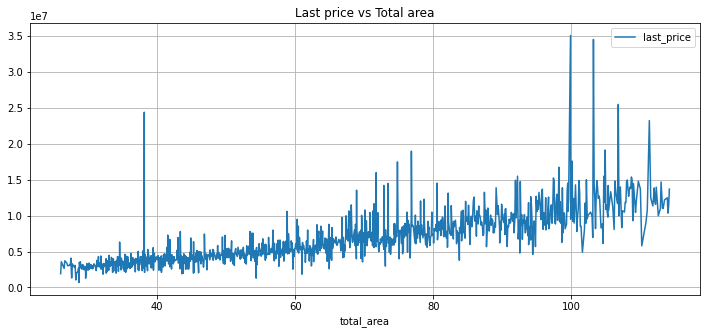

In [ ]:
#построим график по сводной таблице общей площади и цены
data.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12,5))
plt.title('Last price vs Total area')
plt.show() 

По построенному графику сводной таблицы общей площади квартиры и среднего значения цены видно, что цена плавно возрастает с увеличением площади. Пики могут быть связаны с другими факторами, например с количеством комнат,т.к. коэффицент между общей площадью и числом комнат положительный 0,8, близок к единице, связь близка  к линейной. Или от жилой площади, ведь коэффициент Пирсона также положительный 0,91.

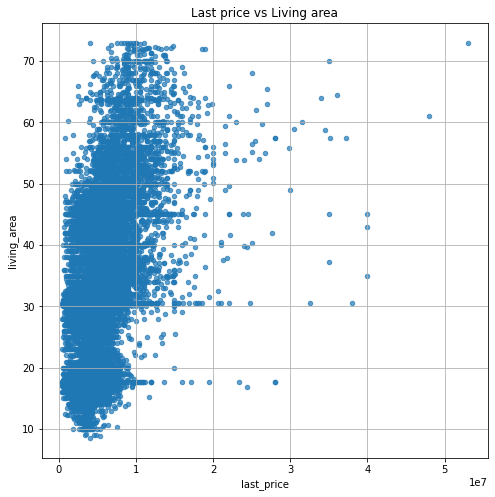

In [ ]:
#построим диаграмму рассеивания Last price vs Living area
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.7,\
          grid=True, figsize=(8,8)) 
plt.title('Last price vs Living area')
plt.show()

По диаграмме рассеивания видно зависимость жилой площади квартиры и цены. Также скопление точек максимально до 50 млн и после 50 кв.м. дальше отклоняется от нуля.

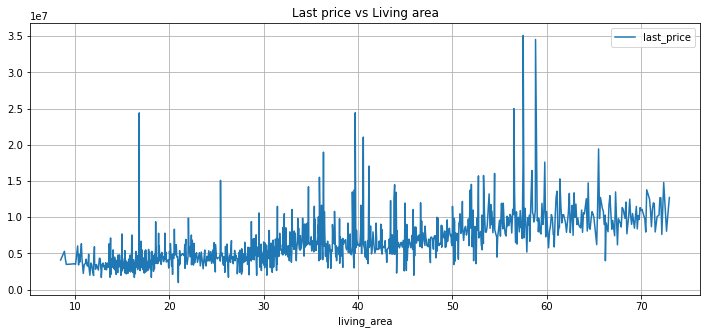

In [ ]:
#построим график по сводной таблице жилой площади и цены
data.pivot_table(index='living_area', values='last_price').plot(grid=True, figsize=(12,5))
plt.title('Last price vs Living area')
plt.show() 

По построенному графику сводной таблицы жилой площади квартиры и среднего значения цены видно, что цена плавно возрастает с увеличением площади. Пики могут быть связаны с другими факторами, например с количеством комнат и от жилой площади, ведь коэффициент Пирсона  положительный 0,91, указывает на линейную связь.

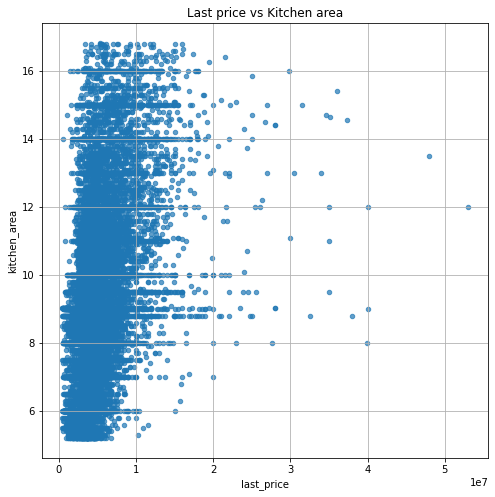

In [ ]:
#построим диаграмму рассеивания Last price vs Kitchen area
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.7,\
          grid=True, figsize=(8,8)) 
plt.title('Last price vs Kitchen area')
plt.show()

По диаграмме рассеивания видно зависимость  площади кухни квартиры и цены. Также скопление точек максимально около 10 млн и 10 кв.м. после 10 кв.м. начинает отклоняться дальше от нуля. Посмотри еще один график.

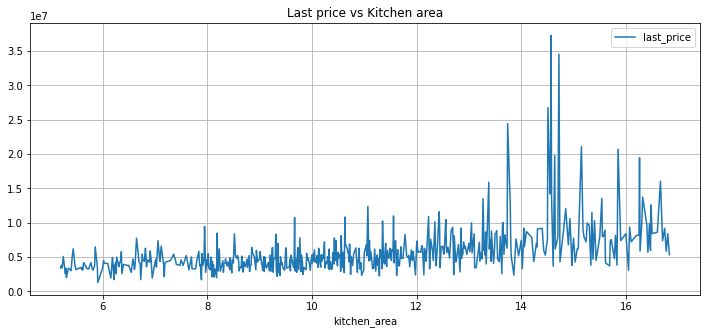

In [ ]:
#построим график по сводной таблице площади кухни и цены
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, figsize=(12,5))
plt.title('Last price vs Kitchen area')
plt.show() 

По построенному графику сводной таблицы площади кухни квартиры и среднего значения цены видно, что цена плавно возрастает с увеличением площади. Пики, как и в предыдущих графиках зависят от других факторов, влияющих на цену квартиры, например от общей площади квартиры, т.к. коэффициент Пирсона 0,42, связь линейная небольшая есть.

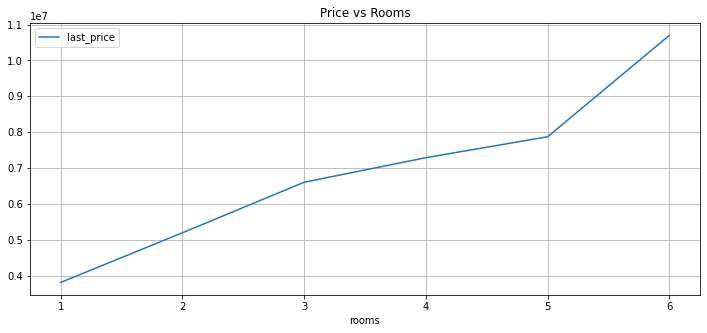

In [ ]:
#построим график по сводной таблице числа комнат и цены
data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12,5))
plt.title('Price vs Rooms')
plt.show() 

По графику видна зависимость числа комнат и цены, чем больше комнат, тем выше цена, т.к. коэфициент Пирсона положительный 0,4. 

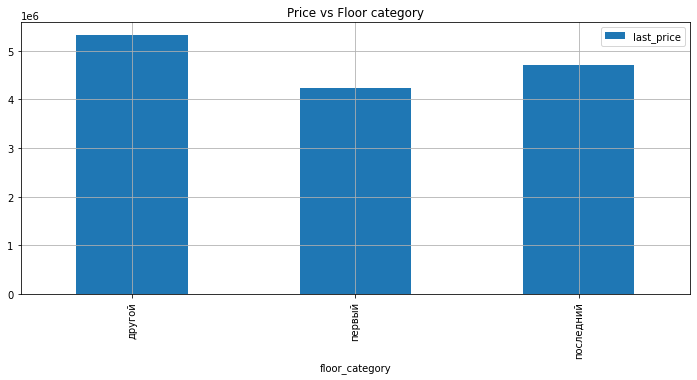

In [ ]:
#построим график по сводной таблице категории этажа и цены
data.pivot_table(index='floor_category', values='last_price').plot(grid=True, kind='bar', figsize=(12,5)) 
plt.title('Price vs Floor category')
plt.show() 

Из гистограммы видно, что цена больше у категории этажей **Другой**, а самая маленькая цена у - **Первый**, чуть больше у **Последнего**

In [ ]:
#Выведем сводную таблицу со значениями цены и категорий этажа
data.pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
другой,5.322207e+06
первый,4.239079e+06
последний,4.701373e+06


In [ ]:
#посмотрим кореляцию Пирсона
data[[ 'last_price', 'first_day_day', 'first_day_month',\
      'first_day_year', 'first_day_weekday']].corr()

,last_price,first_day_day,first_day_month,first_day_year,first_day_weekday
last_price,1.000000,0.008027,-0.003643,0.000778,-0.008953
first_day_day,0.008027,1.000000,-0.019191,-0.028067,-0.052689
first_day_month,-0.003643,-0.019191,1.000000,-0.270012,0.009428
first_day_year,0.000778,-0.028067,-0.270012,1.000000,-0.004377
first_day_weekday,-0.008953,-0.052689,0.009428,-0.004377,1.000000


 По коэффициенту Пирсона видно, что связь цены от дня, месяца, года, дня недели публикации близок к нулю. Значит при росте одной величины, цена остается прежней. Убедимся на графиках. 

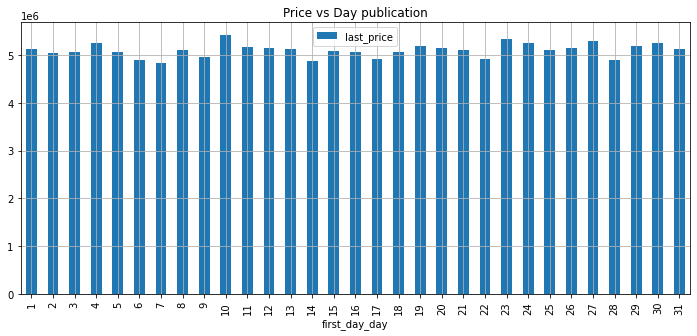

In [ ]:
#построим график по сводной таблице дня публикации объявления и цены
data.pivot_table(index='first_day_day', values='last_price').plot(grid=True,\
                                                                  kind='bar', figsize=(12,5)) 
plt.title('Price vs Day publication')
plt.show() 

По гистограмме видно, что нет особой зависимости цены и в какой день выложили объявление. Значения распределяются приблизительно одинаково.

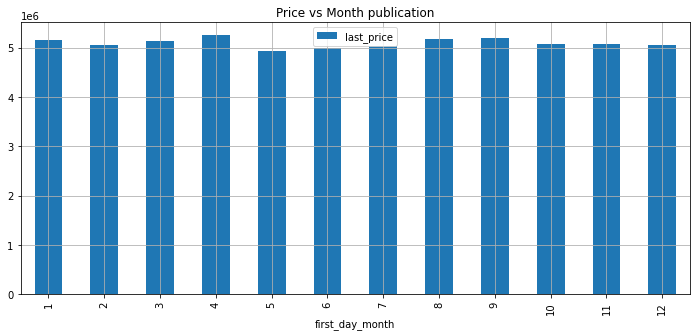

In [ ]:
#построим график по сводной таблице месяца публикации объявления и цены
data.pivot_table(index='first_day_month', values='last_price').plot(grid=True,\
                                                                    kind='bar', figsize=(12,5)) 
plt.title('Price vs Month publication')
plt.show() 

По гистограмме видно, что нет особой зависимости цены и в какой месяц выложили объявление. Значения распределяются приблизительно одинаково.

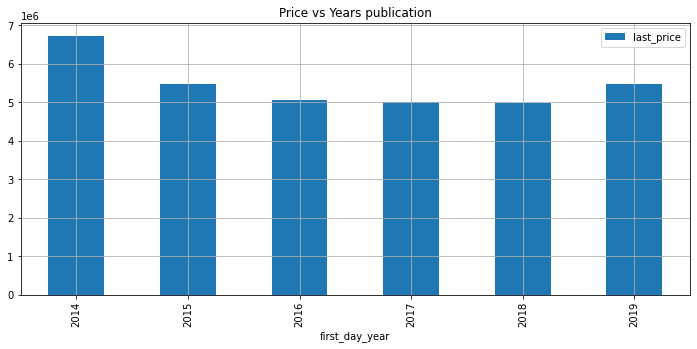

In [ ]:
#построим график по сводной таблице года публикации объявления и цены
data.pivot_table(index='first_day_year', values='last_price').plot(grid=True,\
                                                                   kind='bar', figsize=(12,5)) 
plt.title('Price vs Years publication')
plt.show() 

По гистограмме видно, что есть незначительная зависимость цены и в какой год выложили объявление. Значения цены в 2014 году значительно выше, затем цена снижалась до 2018 г и в 2019 г пошел незначительный рост. И коэфффицент Пирсона отрицательный, говорит, что с увеличением одной величины, уменьшается другая.

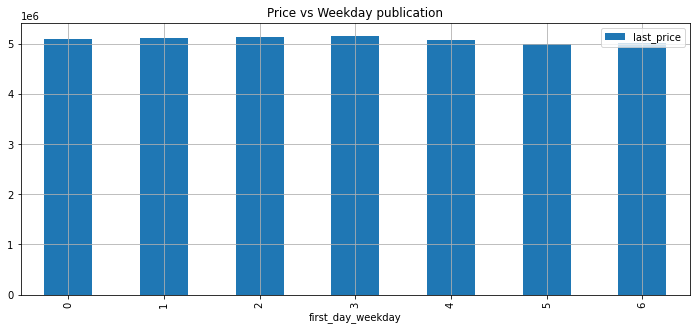

In [ ]:
#построим график по сводной таблице дня недели публикации объявления и цены
data.pivot_table(index='first_day_weekday', values='last_price').plot(grid=True,\
                                                                      kind='bar', figsize=(12,5)) 
plt.title('Price vs Weekday publication')
plt.show() 

По гистограмме видно, что нет особой зависимости цены и в какой день недели выложили объявление. Значения распределяются приблизительно одинаково.

In [ ]:
#Создадим датасет, в котором отберем 10 городов с самым большим 
#количеством объявлений
locality_name_count = data['locality_name'].value_counts().to_frame()
locality_name_count = locality_name_count.reset_index()
locality_name_count.columns = ['locality_name', 'count']
locality_name_count = locality_name_count['locality_name'].loc[:10,]
locality_name_count 

0       Санкт-Петербург
1        поселок Мурино
2        поселок Шушары
3            Всеволожск
4               Колпино
5     поселок Парголово
6                Пушкин
7               Гатчина
8       деревня Кудрово
9                Выборг
10             Петергоф
Name: locality_name, dtype: object

In [ ]:
#Создадим отдельно датасет для анализа по 10 городам с самым большим 
#числом объявлеий. 
#Добавим столбец с ценой за квадратный метр
pd.set_option('mode.chained_assignment', None)
ten_city = data.query('locality_name in @locality_name_count')
ten_city['price_square_meter'] = ten_city['last_price']/ten_city['total_area']

ten_city


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_category,first_day_day,first_day_month,first_day_year,first_day_weekday,price_square_meter
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18.603,0.0,NaN,0.0,NaN,81.0,первый,4,12,2018,1,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13.933,1.0,90.0,2.0,574.0,558.0,другой,20,8,2015,3,92785.714286
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19.143,0.0,NaN,0.0,NaN,155.0,другой,2,11,2017,3,99195.710456
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,другой,23,5,2018,2,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15.008,0.0,NaN,0.0,NaN,289.0,другой,26,2,2017,6,88524.590164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.00,12,False,False,False,15.00,0,Санкт-Петербург,15632.0,14.428,0.0,NaN,0.0,NaN,23.0,другой,1,4,2019,0,91089.108911
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.30,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16.081,1.0,353.0,2.0,652.0,29.0,другой,28,2,2018,2,100566.572238
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.00,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6.263,1.0,300.0,0.0,NaN,15.0,другой,19,7,2018,3,105769.230769
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4.489,0.0,NaN,1.0,806.0,519.0,другой,13,10,2016,3,129903.978052


In [ ]:
#посчитаем максимальное значение цены за квадратный метр в 10 крупных городах
ten_city.groupby('locality_name')['price_square_meter'].max().sort_values(ascending=False)

locality_name
Санкт-Петербург      848484.848485
Всеволожск           640422.350472
Петергоф             225971.731449
Пушкин               167410.714286
Гатчина              146315.789474
деревня Кудрово      142857.142857
поселок Мурино       138580.246914
поселок Парголово    138522.427441
поселок Шушары       126666.666667
Колпино              125000.000000
Выборг                94805.194805
Name: price_square_meter, dtype: float64

In [ ]:
#посчитаем минимальное значение цены за квадратный метр в 10 крупных городах
ten_city.groupby('locality_name')['price_square_meter'].min().sort_values(ascending=True)

locality_name
Гатчина              10897.435897
Санкт-Петербург      17391.304348
Выборг               18750.000000
Всеволожск           31400.000000
поселок Шушары       47700.416089
Колпино              47957.371226
поселок Парголово    48405.466970
поселок Мурино       50000.000000
Петергоф             51612.903226
деревня Кудрово      54160.346696
Пушкин               59836.065574
Name: price_square_meter, dtype: float64

In [ ]:
#посчитаем среднюю цену за квадратный метр в 10 крупных городах
ten_city.groupby('locality_name')['price_square_meter'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург      108389.967485
Пушкин               101748.899151
деревня Кудрово       92353.059770
поселок Парголово     90852.731191
поселок Мурино        84390.438296
Петергоф              84209.932624
поселок Шушары        78096.595911
Колпино               75277.254000
Гатчина               69172.471617
Всеволожск            68592.947499
Выборг                57554.798281
Name: price_square_meter, dtype: float64

Подитожим: видно, что  минимальное значение цены за квадратный метр в 10 крупных городах начинается 10897 в Гатчине. Максимальное - в Санкт-петербурге, а средняя цена за кв метр самые большие цифры в Санкт-Петербурге, а низкая цена среднего в Пушкин. Значит, значение цены за квадратный метр зависит от города нахождения.

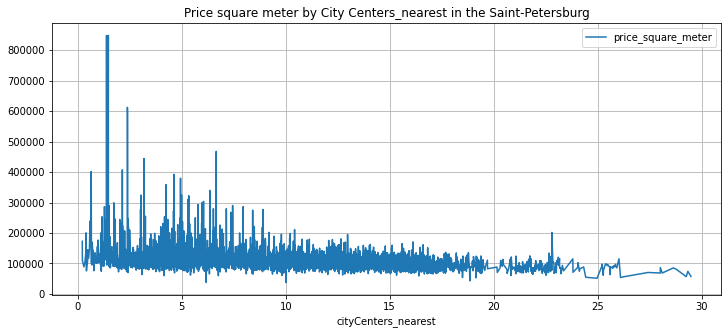

In [ ]:
#Выведем на эран график зависимости цены за кв метр 
#от удаленности от центра Санкт-Петербурга в километрах
ten_city.query('locality_name == "Санкт-Петербург"').\
pivot_table(index='cityCenters_nearest', values='price_square_meter').\
plot(grid=True, figsize=(12,5))
plt.title('Price square meter by City Centers_nearest in the Saint-Petersburg')
plt.show()

Из выведенного графика видно, что чем ближе к центру города Санкт-Петербург, тем выше цена за квадратный метр. До 10 км выше колебания в цене, больше пиковых значений. Это зависеть может от дополнительных факторов, влияющих на цену. После 10 км значения находятся в одном диапазоне без явных скачков до 20000 за кв.м. Изучим из-за чего могут быть пики.

In [ ]:
#посмотрим коэфициент корреляции Пирсона для квартир Санкт-Петербурга
#интересно влияние на среднюю цену на квадратный метр
pd.set_option('display.max_columns', None)
ten_city.query('locality_name == "Санкт-Петербург"').corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_day,first_day_month,first_day_year,first_day_weekday,price_square_meter
total_images,1.000000,0.130123,0.088612,0.064314,0.014994,0.033037,0.082446,0.044726,0.007001,-0.009500,-0.011934,0.044914,0.066265,0.007121,0.016883,0.005150,-0.019728,-0.023215,-0.002336,-0.045684,0.000562,0.006086,0.159028,0.000897,0.113074
last_price,0.130123,1.000000,0.718434,0.429240,0.372564,0.037639,0.588372,0.039707,0.007522,-0.004377,0.009148,0.451398,0.059770,-0.024925,-0.370268,0.166659,0.030134,0.212834,-0.099353,0.101700,0.012473,-0.010733,0.016972,0.000250,0.676248
total_area,0.088612,0.718434,1.000000,0.794102,0.306294,-0.018209,0.913997,-0.021327,-0.000232,-0.009928,0.010761,0.444903,0.053883,-0.023005,-0.235415,0.100019,0.007482,0.144323,-0.057397,0.123445,-0.000249,0.004335,-0.054639,-0.006451,0.027291
rooms,0.064314,0.429240,0.794102,1.000000,0.112476,-0.239894,0.900066,-0.171457,-0.021354,-0.009761,0.011417,0.042523,-0.000495,-0.049402,-0.168399,0.072783,-0.051287,0.045513,-0.027314,0.080604,0.002695,-0.000686,-0.029130,0.001723,-0.187051
ceiling_height,0.014994,0.372564,0.306294,0.112476,1.000000,-0.096556,0.237337,-0.054284,0.043206,0.002949,0.023242,0.291975,-0.074959,-0.093371,-0.412993,0.197586,-0.052014,0.196825,-0.119495,0.088581,-0.001422,0.012295,-0.078705,-0.006558,0.252422
floors_total,0.033037,0.037639,-0.018209,-0.239894,-0.096556,1.000000,-0.185281,0.634843,-0.022726,-0.002206,0.000191,0.391512,0.194563,0.093168,0.318747,-0.225027,0.088746,-0.081761,0.027434,-0.022604,-0.001129,-0.005272,0.011800,0.015446,0.108822
living_area,0.082446,0.588372,0.913997,0.900066,0.237337,-0.185281,1.000000,-0.130840,-0.011051,-0.007009,0.015877,0.200452,0.014179,-0.048697,-0.240740,0.116096,-0.039479,0.101892,-0.040635,0.102497,0.003305,-0.001359,-0.045155,-0.006191,-0.078247
floor,0.044726,0.039707,-0.021327,-0.171457,-0.054284,0.634843,-0.130840,1.000000,-0.009629,0.006700,0.008494,0.252778,0.179518,0.061086,0.210460,-0.140439,0.071982,-0.043509,0.025708,-0.026542,0.002354,-0.000169,0.012171,0.015571,0.101042
is_apartment,0.007001,0.007522,-0.000232,-0.021354,0.043206,-0.022726,-0.011051,-0.009629,1.000000,-0.000383,-0.000663,0.014775,0.037048,0.023932,0.034807,-0.005890,-0.014633,0.010535,0.017247,0.003690,0.001779,-0.003650,0.016022,-0.015807,0.014538
studio,-0.009500,-0.004377,-0.009928,-0.009761,0.002949,-0.002206,-0.007009,0.006700,-0.000383,1.000000,-0.000132,-0.001200,0.012881,-0.003415,-0.013241,-0.006766,NaN,0.002902,-0.004478,-0.004807,0.009647,-0.006091,-0.011713,-0.012557,0.006618


In [ ]:
#выведем список характерных значений столбца price_square_meter в Санкт-Петербурге
ten_city.query('locality_name == "Санкт-Петербург"')['price_square_meter'].describe()

count     13082.000000
mean     108389.967485
std       31661.286790
min       17391.304348
25%       90204.264549
50%      102598.290902
75%      119781.804504
max      848484.848485
Name: price_square_meter, dtype: float64

При анализе влияния на **среднюю цену за квадратный метр** в Санкт-Петербурге видно, что не значительное влияние имеют **ponds_around3000** с коэффицентом Пирсона 0,17, **parks_around3000**  с коэффицентом Пирсона 0,14, **kitchen_area** с коэффицентом Пирсона 0,24,  **ceiling_height** с корреляцией 0,25, все они положительные, это значит, что с ростом этих величин растет и цена, т.к до 1 далеки эти значения, значит рост не такой явный. **total_area** с корреляцией 0,027, у **floor  и floor_total** равны 0.1, те. стремится к нулю значение, значит связь между общей площадью и ценой имеют не линейный характер.

**cityCenters_nearest** меет отрицательную корреляцию -0,33, значит, что с уменьшением значения cityCenters_nearest, растет средняя цена за кв метр. Также и с **rooms** имеет отрицательную кореляцию - 0,18.

Остальные значения кореляции близки к нулю и значит, линейная связь между остальными значениями и ценой за кв метр не носят линейный характер, либо и вовсе отсутствует.

Средняя цена в **Санкт-Петербурге** 102598, медианная приблизительно такая же - 108390 за квадратный метр жилья. Масимальная стоимость за квадратный метр в городе Петра I  достигает 84 8485 за кв.метр, а минимальная - 17 391. 


In [ ]:
#создает столбец cityCenters_nearest_km с округленными значениями по км
ten_city['cityCenters_nearest_km'] = ten_city['cityCenters_nearest'].round()
ten_city['cityCenters_nearest_km'].describe()

count    14542.000000
mean        13.744464
std          6.645640
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         50.000000
Name: cityCenters_nearest_km, dtype: float64

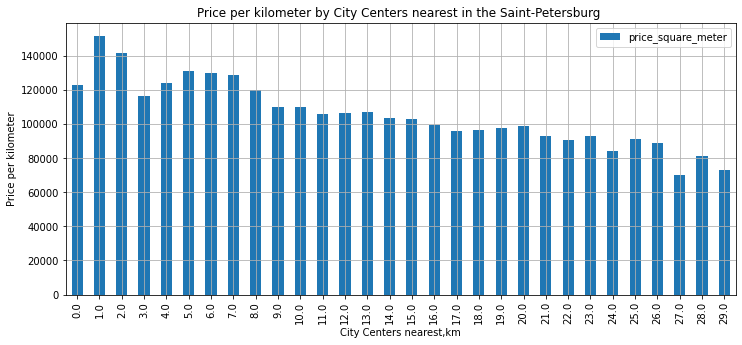

In [ ]:
#Выведем на эран гистограмму зависимости цены за кв метр 
#от удаленности от центра Санкт-Петербурга в километрах
ten_city.query('locality_name == "Санкт-Петербург"').\
pivot_table(index='cityCenters_nearest_km', values='price_square_meter').reset_index().\
plot(x='cityCenters_nearest_km',kind='bar', grid=True, figsize=(12,5)) 
plt.title('Price per kilometer by Сity Centers nearest in the Saint-Petersburg ')
plt.xlabel('Сity Centers nearest, km')
plt.ylabel('Price per kilometer') 
plt.show()

In [ ]:
#Выведем сводную таблицу цены за километры в Санкт-Петербурге
ten_city.query('locality_name == "Санкт-Петербург"').\
pivot_table(index='cityCenters_nearest_km', values='price_square_meter')

,price_square_meter
cityCenters_nearest_km,
0.0,122957.560803
1.0,151749.625785
2.0,141472.276766
3.0,116509.395497
4.0,124215.587187
5.0,131048.905075
6.0,129969.784081
7.0,128794.812454
8.0,119757.585765


 Получили сводную таблицу со средней ценой за километр в городе Санкт-Петербурге, самый дорогой километр первый, его средняя цена 151 750 за кв метр жилья. По графику наблюдаем также некоторые скачки в районе 5-6, 20 и 27-28 км. Это может быть связано с новыми элитными районами (экология, транспортная доступность, развитая инфраструктура). Далее по удалености от центра, цена снижается.

### Общий вывод

Выявили, что больше всего квартир ( больше 12000), было продано меньше, чем за 200 дней. 
При подсчете **среднего значения**, выяснили точное количество дней - это 180. 
Самая **быстрая продажа** было совершена за 1 день, а самая **долгая продажа** совершена по истечению  1580 дней. 

По диаграмме рассеивания увидели зависимость общей площади квартиры и цены. Максимальное количество объявлений было с ценой до 1млн и 100 кв.м общей площади.
По диаграмме рассеивания увидели зависимость жилой площади квартиры и цены. Максимальное количество объявлений было с ценой до 1млн и 50 кв.м жилой площади квартиры.
По диаграмме рассеивания увидели зависимость  площади кухни квартиры и цены. Максимальное количество объявлений было с ценой о около 1млн и 15-20 кв.м площади кухни квартиры.
Проанализировав график по сводной таблице общей площади квартиры и среднего значения цены увидели, что цена плавно возрастает с увеличением площади. 

По построенному графику сводной таблицы жилой площади квартиры и среднего значения цены отметили, что цена плавно возрастает с увеличением площади. 

В дальнейшем отметили, что есть зависимость количества комнат и цены по получченным граикам. До 7 комнат, она растет, далее идет снижение небольшое.


Также выявлена зависимость от цены от категории этажа. Цена больше у категории этажей **Последний**, а самая маленькая цена у - **Первый**


Не увидели особой зависимости цены и в какой день выложили объявление. Значения распределяются приблизительно одинаково.
Тоже самое и в зависимости цены и в какой месяц выложили объявление. Значения распределяются приблизительно одинаково.
Нет особой зависимости цены и в какой день недели выложили объявление. Значения распределяются приблизительно одинаково.
Есть зависимость цены и в какой год выложили объявление. Значения цены в 2014 году значительно выше, затем цена снижалась до 2018 г и в 2019 г пошел незначительный рост.


Значение цены за квадратный метр зависит от города нахождения. Максимальные значения в крупном городе Санкт-Петербурге.
И чем ближе к центру города Санкт-Петербург, тем выше цена за квадратный метр. До 5 км выше колебания в цене, больше пиковых значений. После 10 км значения находятся в одном диапазоне без явных скачков.


При работе с данными мы заполнили пустые значения, где это возможно, убрали дубликаты и явные всплески, которые могли бы повлиять на дальнейшее исследование.

    
Выявили, что больше всего квартир ( больше 12000), было продано меньше, чем за 200 дней. При подсчете среднего значения, выяснили точное количество дней - это 173. Самая быстрая продажа было совершена за 1 день, а самая долгая продажа совершена по истечению 1580 дней.
       
Убедились, что есть зависимость числа комнат и цены, чем больше комнат, тем выше цена.
   
Цена плавно возрастает с увеличением площади, жилой площади, площади кухни.
         
По коэффициенту Пирсона увидели, что связь цены от дня, месяца, года, дня недели публикации близок к нулю. Значит не зависимо от даты и дня недели, цена никак не меняется. Есть небольшая зависимость цены и в какой год выложили объявление. Значения цены в 2014 году значительно выше, затем цена снижалась до 2018 г и в 2019 г пошел незначительный рост.
     
    
Цена квартиры ниже у квартир на **первом** этаже, немного больше у квартир на **последнем**, а  квартиры с остальными этажами преобладают по  цене.
   
При анализе влияния на среднюю цену за квадратный метр в Санкт-Петербурге видно, что не значительное влияние имеют **число водоемов в радиусе 3км, число парков в радиусе 3км, площадь кухни, общая площадь, и высота потолков, что с ростом этих величин растет и цена, но рост не такой явный.
  
**Расстояние до центра города** также влияет на цену за квадратный метр,  с уменьшением значения расстояния, растет средняя цена за кв метр.
   
    
Остальные значения столбцов имеют,либо не линейную связь между  ценой за кв метр, либо  и вовсе отсутствует.
    

Средняя цена в **Санкт-Петербурге** 102 598, медианная приблизительно такая же - 108 390 за квадратный метр жилья. Минимальная цена 10 897 за кв.м, максимальная ближе к центру 848 484 за кв.м. 

Выяснили, что самый дорогой километр по стоимости в **Санкт-Петербурге** - это **первый**, его средняя цена 151 750 за кв метр жилья. По графику наблюдаем также некоторые скачки в районе 5-6, 20 и 27-28 км. Это может быть связано с новыми элитными районами (экология, транспортная доступность, развитая инфраструктура).
